In [98]:
import matplotlib.pyplot as plt # visualização de dados
import yfinance as yf # dados financeiros
import pandas as pd # manipulação de dados

# Machine learning
from sklearn.metrics import(
    r2_score,
    mean_absolute_error,
    mean_absolute_percentage_error,
)

from neuralprophet import NeuralProphet

• Download dos dados(passo 1)

In [99]:
asset_code = "BTC-USD" # Bitcoin
start_date = "2015-01-01"
final_date = "2025-08-09"

# Dados históricos (DataFrame)
asset_data = yf.download(asset_code, start=start_date, end=final_date, multi_level_index=False)
 
# Visualizar dados
asset_data

WARNING - (py.warnings._showwarnmsg) - /var/folders/gj/xq3l6h9d6dx44zqvjxthjdsr0000gn/T/ipykernel_66582/4063311435.py:6: FutureWarning:

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2015-01-01,314.248993,320.434998,314.002991,320.434998,8036550
2015-01-02,315.032013,315.838989,313.565002,314.079010,7860650
2015-01-03,281.082001,315.149994,281.082001,314.846008,33054400
2015-01-04,264.195007,287.230011,257.612000,281.145996,55629100
2015-01-05,274.473999,278.341003,265.084015,265.084015,43962800
...,...,...,...,...,...
2025-08-04,115071.882812,115729.468750,114130.406250,114223.921875,35783028986
2025-08-05,114141.445312,115117.437500,112701.109375,115072.187500,61039182286
2025-08-06,115028.000000,115737.835938,113372.250000,114140.914062,56379133510


• Formatação dos dados(passo 2)

In [100]:
# Verificando a coluna 'Date' para o formato datetime, essencial para análises temporais
asset_data.index


DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2025-07-30', '2025-07-31', '2025-08-01', '2025-08-02',
               '2025-08-03', '2025-08-04', '2025-08-05', '2025-08-06',
               '2025-08-07', '2025-08-08'],
              dtype='datetime64[ns]', name='Date', length=3873, freq=None)

In [101]:
# Caso fosse necessário coonverter datas para objetos datetime
# asset_data.index = pd.to_datetime(asset_data.index)

# Formatação de dados para coincindir com formato esperado pelo Modelo NeuralProphet
# Filtrando a coluna 'Close' e aplicando reset_index para mover o índice de data para uma coluna normal

asset_data = asset_data[["Close"]].reset_index()

# Modelo NeuralProphet exige que a coluna com as datas seja nomeada de "ds" e valores "y"
asset_data.columns = ["ds", "y"]

asset_data

,ds,y
0,2015-01-01,314.248993
1,2015-01-02,315.032013
2,2015-01-03,281.082001
3,2015-01-04,264.195007
4,2015-01-05,274.473999
...,...,...
3868,2025-08-04,115071.882812
3869,2025-08-05,114141.445312
3870,2025-08-06,115028.000000
3871,2025-08-07,117496.898438


• Treinando modelo(passo 3)

In [102]:
# Criando modelo 
neural_model = NeuralProphet() # No NeuralProphet podemos settar alguns parâmetros como epoch, recomendado manter o padrão, pois ele calcula automaticamente o numero de interações

# Treinando modelo com dados selecionados
neural_model.fit(asset_data)




WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 64
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 70


Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (61) is too small than the required number                     for the learning rate finder (239). The results might not be optimal.


Finding best initial lr:   0%|          | 0/239 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss,epoch
0,0.849620,0.0,122615.859375,148016.468750,0.848083,0.0,0
1,0.488617,0.0,77977.312500,96814.101562,0.487724,0.0,1
2,0.258738,0.0,47983.734375,58101.589844,0.257953,0.0,2
3,0.155809,0.0,33423.445312,39391.046875,0.155251,0.0,3
4,0.093723,0.0,24250.746094,28309.289062,0.093444,0.0,4
...,...,...,...,...,...,...,...
65,0.006372,0.0,4441.952148,6105.045898,0.006378,0.0,65
66,0.006365,0.0,4504.024902,6115.664551,0.006385,0.0,66
67,0.006335,0.0,4455.499512,6094.052734,0.006341,0.0,67
68,0.006344,0.0,4453.278809,6096.485840,0.006339,0.0,68


In [103]:
# Criando dataframe com previsões futuras para o próximo 1 ano (365 dias)
future_data = neural_model.make_future_dataframe(asset_data, periods=365)

# Fazendo previsões para o futuro
future_predictions = neural_model.predict(future_data)

# Fazendo previsões para trás (Histórico a ser avaliado)
historical_predictions = neural_model.predict(asset_data)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.974% of the data.
WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/df_utils.py:1152: FutureWarning:

Series.view is deprecated and will be removed in a future version. Use ``ast

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


In [104]:
historical_predictions


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2015-01-01,314.248993,370.306519,-50.804794,369.369324,51.741993
1,2015-01-02,315.032013,335.698456,-49.945404,362.468842,23.175016
2,2015-01-03,281.082001,298.151093,-49.086014,356.045837,-8.808710
3,2015-01-04,264.195007,310.594513,-48.226624,350.148193,8.672951
4,2015-01-05,274.473999,178.358963,-47.367233,344.765991,-119.039795
...,...,...,...,...,...,...
3868,2025-08-04,115071.882812,103146.125000,103849.320312,-584.111450,-119.080353
3869,2025-08-05,114141.445312,103396.500000,103940.710938,-632.017639,87.803078
3870,2025-08-06,115028.000000,103303.335938,104032.101562,-685.308899,-43.460278
3871,2025-08-07,117496.898438,103431.515625,104123.500000,-743.738525,51.759865


In [105]:
future_predictions

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2025-08-09,None,103421.929688,104306.257812,-875.195618,-9.136898
1,2025-08-10,None,103458.726562,104397.679688,-947.765808,8.814978
2,2025-08-11,None,103345.703125,104489.046875,-1024.418213,-118.928810
3,2025-08-12,None,103563.492188,104580.460938,-1104.888184,87.918983
4,2025-08-13,None,103439.843750,104671.835938,-1188.610107,-43.382591
...,...,...,...,...,...,...
360,2026-08-04,None,136722.656250,137207.828125,-573.027954,87.839554
361,2026-08-05,None,136636.390625,137299.218750,-619.562927,-43.269905
362,2026-08-06,None,136770.812500,137390.625000,-671.487732,51.678234
363,2026-08-07,None,136776.265625,137482.015625,-728.682190,22.942236


In [106]:
# Plotando modelo

neural_model.plot_components(future_predictions)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:283: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:410: Fut

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'showlegend': False,
              'type': 'scatter',
              'uid': 'd04d9058-c5e8-4e98-b395-4b08ce8fee1d',
              'x': array([datetime.datetime(2025, 8, 9, 0, 0),
                          datetime.datetime(2025, 8, 10, 0, 0),
                          datetime.datetime(2025, 8, 11, 0, 0), ...,
                          datetime.datetime(2026, 8, 6, 0, 0),
                          datetime.datetime(2026, 8, 7, 0, 0),
                          datetime.datetime(2026, 8, 8, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([104306.26, 104397.68, 104489.05, ..., 137390.62, 137482.02, 137573.4 ],
                         dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'yearly seasonality',
 

In [107]:

neural_model.plot_components(historical_predictions)

WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


WARNING - (py.warnings._showwarnmsg) - /Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavi

FigureWidgetResampler({
    'data': [{'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': '<b style="color:sandybrown">[R]</b> Trend <i style="color:#fc9944">~4D</i>',
              'showlegend': False,
              'type': 'scatter',
              'uid': '916684a0-5db1-4136-bd26-e964e6903a59',
              'x': array([datetime.datetime(2015, 1, 1, 0, 0),
                          datetime.datetime(2015, 1, 4, 0, 0),
                          datetime.datetime(2015, 1, 7, 0, 0), ...,
                          datetime.datetime(2025, 7, 31, 0, 0),
                          datetime.datetime(2025, 8, 6, 0, 0),
                          datetime.datetime(2025, 8, 8, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([-5.0804794e+01, -4.8226624e+01, -4.5648468e+01, ...,  1.0348375e+05,
                           1.0403210e+05,  1.0421489e+05], dtype=float32),
              'yaxis': 'y'},
             {'line': {'color': '

• Avaliando modelo

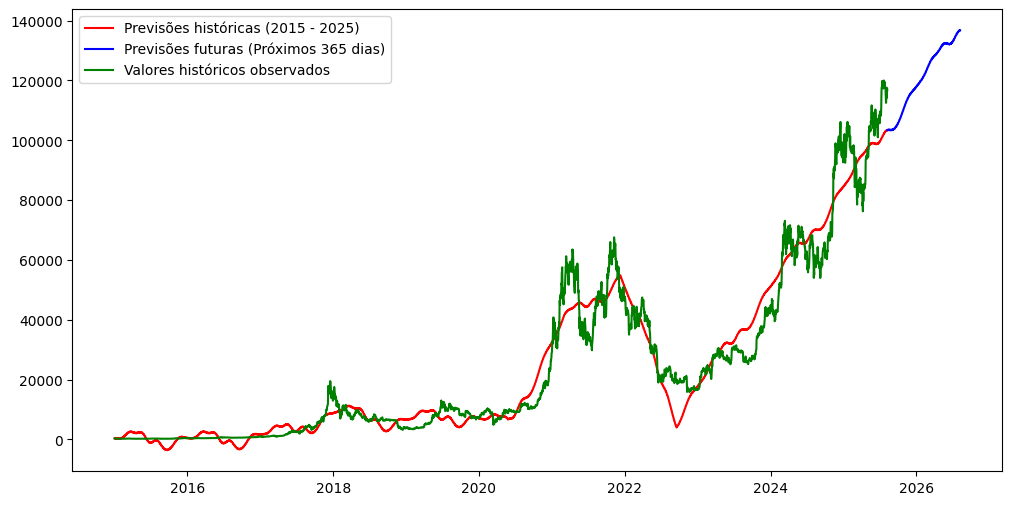

In [108]:
# Criando figura
plt.figure(figsize=(12, 6))

# Gráfico de linha com previsões históricas (Vermelho)
plt.plot(
    historical_predictions["ds"],
    historical_predictions["yhat1"],
    label ="Previsões históricas (2015 - 2025)",
    c="r"
)

# Gráfico de linha com previsões históricas (Azul)
plt.plot(
    future_predictions["ds"],
    future_predictions["yhat1"],
    label ="Previsões futuras (Próximos 365 dias)",
    c="b"
)

# Gráfico de linha com dados históricos (Verde)
plt.plot(
    asset_data["ds"],
    asset_data["y"],
    label ="Valores históricos observados",
    c="g"
)

plt.legend()
plt.show()

In [ ]:
# Avaliando modelo usando métricas
# R2 mede quanto da variância dos dados é explicada pelo seu modelo
r2_score(y_true=historical_predictions["y"], y_pred=historical_predictions["yhat1"])

# MAE mede quanto na média seu modelo erra (erro médio absoluto)

# O mean_absolute_error mostra quanto o modelo errou em unidade
mean_absolute_error(y_pred=historical_predictions["yhat1"], y_true=historical_predictions["y"])
# O mean_absolute_error mostra quanto o modelo errou em percentagem
mean_absolute_percentage_error(y_pred=historical_predictions["yhat1"], y_true=historical_predictions["y"])

1.0617938573583015